- DeepLabv1 and DeepLabv2 are reviewed together because they both use Atrous Convolution and Fully Connected Conditional Random Field (CRF) except that DeepLabv2 has one additional technology called Atous Spatial Pyramid Pooling (ASPP), which is the main difference from DeepLabv1. (Of course, there are other differences as well, e.g.: DeepLabv2 uses ResNet and VGGNet for experiment but DeepLabv1 only uses VGGNet.)  
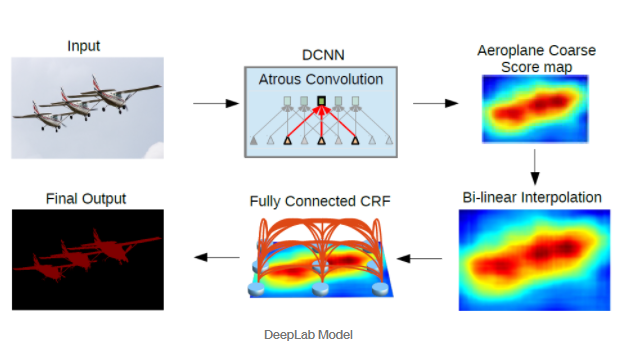
- The above figure is the DeepLab model architecture. First, the input image goes through the network with the use of atrous convolution and ASPP. Then the output from the network is bilinearly interpolated and goes through the fully connected CRF to fine tune the result and get the final output.
- DeepLabv1 and DeepLabv2 have been published in 2015 ICLR and 2018 TPAMI with about 400 and 2000 citations respectively 

# 1. Atrous Convolution
- The term “Atrous” indeed comes from French “à trous” meaning hole. Thus, it is also called “algorithme à trous” and “hole algorithm”. Some of the papers also call this “dilated convolution”. It is commonly used in wavelet transform and right now it is applied in convolutions for deep learning.
Below is the equation of atrous convolution:  
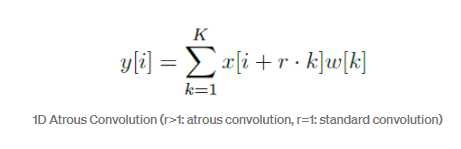
- When r=1, it is the standard convolution we usually use.
- When r>1, it is the atrous convolution which is the stride to sample the input sample during convolution.

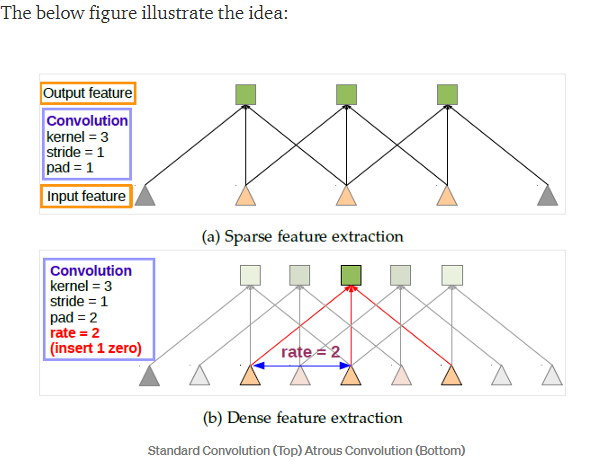
- The idea of atrous convolution is simple. At the top of the figure above, it is the standard convolution.
- At the bottom of the figure, it is the atrous convolution. We can see that when rate = 2, the input signal is sampled alternatively. First, pad=2 means we pad 2 zeros at both left and right sides. Then, with rate=2, we sample the input signal every 2 inputs for convolution. Thus, at the output, we will have 5 outputs which makes the output feature map larger.
- If we remember FCN, a series of convolution and pooling makes the output feature map very small, and need 32× upsampling which is an aggressive upsampling.
- Also, atrous convolution allows us to enlarge the field of view of filters to incorporate larger context. It thus offers an efficient mechanism to control the field-of-view and finds the best trade-off between accurate localization (small field-of-view) and context assimilation (large field-of-view).
- In DeepLab, using VGG-16 or ResNet-101, the stride of last pooling (pool5) or convolution conv5_1 is set to 1 respectively to avoid signal from decimated too much. And atrous convolution is used to replace all subsequent convolutional layers using rate = 2. The output is much larger. We only need to have 8× upsampling to upsample the output. And bilinear interpolation has quite good performance for 8× upsampling.


# Atrous Spatial Pyramid Pooling (ASPP)
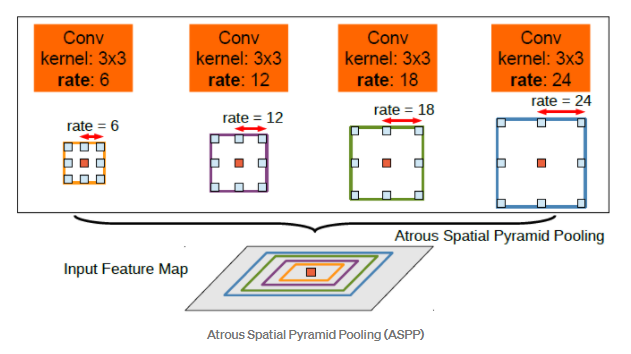
- ASPP actually is an atrous version of SPP, in which the concept has been used in SPPNet. In ASPP, parallel atrous convolution with different rate applied in the input feature map, and fuse together.
- As objects of the same class can have different scales in the image, ASPP helps to account for different object scales which can improve the accuracy.


# Fully Connected Conditional Random Field (CRF)
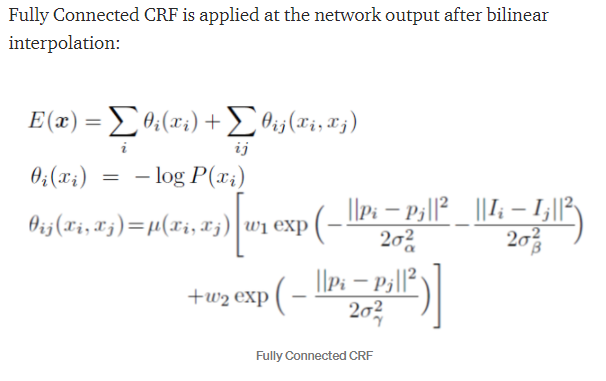
- x is the label assignment for pixels. P(xi) is the label assignment probability at pixel i. Therefore the first term θi is the log probability.
- For the second term, θij, it is a filter. µ = 1 when xi != xj. µ = 0 when xi = xj. In the bracket, it is the weighted sum of two kernels. The first kernel depends on pixel value difference and pixel position difference, which is a kind of bilateral filter. Bilateral filter has the property of preserving edges. The second kernel only depends on pixel position difference, which is a Gaussian filter. Those σ and w, are found by cross validation. The number of iteration is 10.

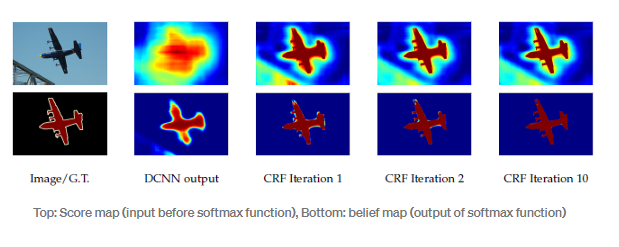
- With 10 times of CRF, those small areas with different colors around the aeroplane are smoothed out successfully.
- However, CRF is a post-processing process which makes DeepLabv1 and DeepLabv2 become not an end-to-end learning framework. And it is NOT used in DeepLabv3 and DeepLabv3+ already.

# Results
## Ablation Study
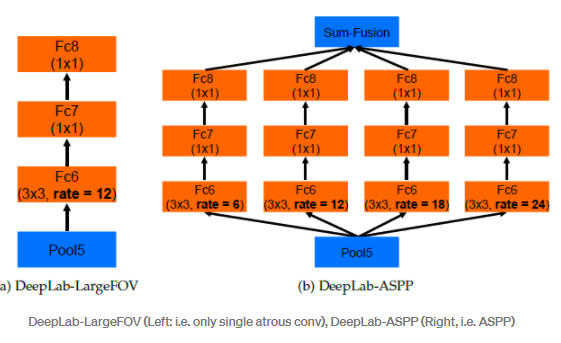

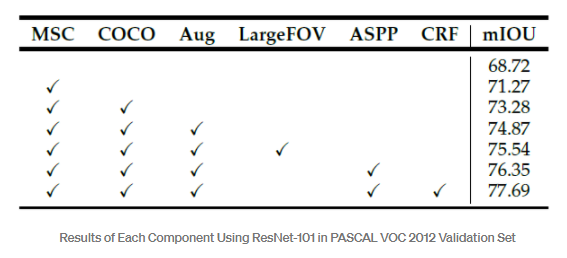
- The simplest ResNet-101: 68.72%    
- MSC: Multiple Scale Input    
- COCO: Models pretrained by COCO dataset    
- Aug: Data augmentation by randomly scaling the input images (from 0.5 to 1.5)   
- LargeFOV: DeepLab using single-pass atrous convolution   
- ASPP: DeepLab using parallel atrous convolutions    
- CRF: Fully-connected CRF as post-processing.    
- Finally, it got 77.69%. And it can be seen that MSC, COCO and Aug contribute the improvement from 68.72% to 74.87%, which are equally essential with LargeFOV, ASPP and CRF.     